# EM vs K-Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.metrics as sm
from sklearn import datasets

from sklearn import preprocessing

In [2]:
iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

X.sample(10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
93,5.0,2.3,3.3,1.0
122,7.7,2.8,6.7,2.0
90,5.5,2.6,4.4,1.2
76,6.8,2.8,4.8,1.4
82,5.8,2.7,3.9,1.2
109,7.2,3.6,6.1,2.5
133,6.3,2.8,5.1,1.5
141,6.9,3.1,5.1,2.3
14,5.8,4.0,1.2,0.2
99,5.7,2.8,4.1,1.3


## EM

In [3]:
from sklearn.mixture import GaussianMixture

model_em = GaussianMixture(n_components=3)
model_em.fit(X)

labels_em = model_em.predict(X)

## KMeans

In [4]:
from sklearn.cluster import KMeans

model_km = KMeans(n_clusters=3)
model_km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Result

Text(0, 0.5, 'Petal Width')

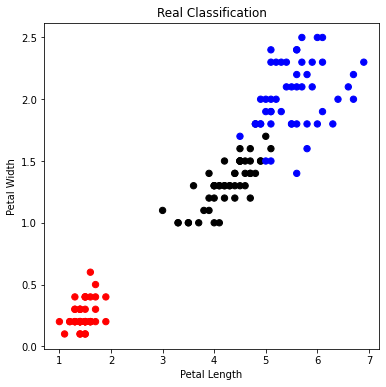

In [5]:
plt.figure(figsize=(6,6))
colormap = np.array(['red', 'black', 'blue'])
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

The accuracy score of EM:  0.9333333333333333


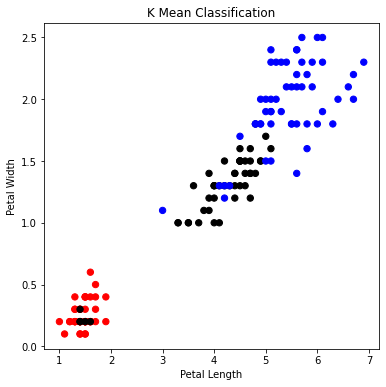

In [7]:
plt.figure(figsize=(6,6))
colormap = np.array(['red', 'black', 'blue'])
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[labels_em], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of EM: ',sm.accuracy_score(y, labels_em))

The accuracy score of K-Mean:  0.8933333333333333


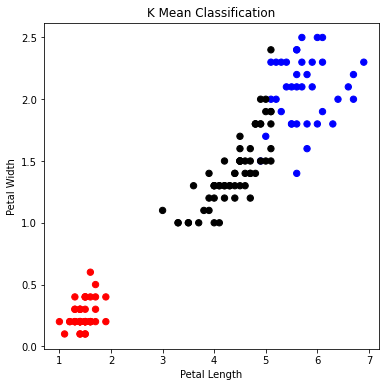

In [8]:
plt.figure(figsize=(6,6))
colormap = np.array(['red', 'black', 'blue'])
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model_km.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model_km.labels_))